In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

sample_submission.csv
test.csv
train.csv



In [2]:
import pandas as pd

train_data = pd.read_csv("../input/train.csv")
# 前十筆資料
train_data.head(10)
# 後十筆資料
# train_data.tail(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [3]:
# 資料資訊，可檢查缺項
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
# NA 個數
naCount = train_data.isnull().sum()
naCount[naCount > 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [6]:
# skewness
train_data.skew()

Id                0.000000
MSSubClass        1.407657
LotFrontage       2.163569
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.669084
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.649415
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
S

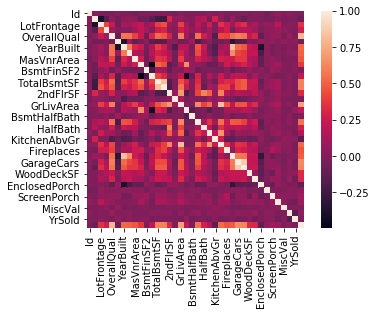

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# 計算相關性
corrmat = train_data.corr()
# 畫圖
sns.heatmap(corrmat, square=True)
# 顯示圖片
plt.show()

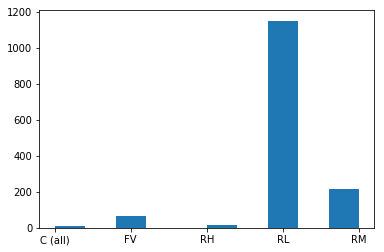

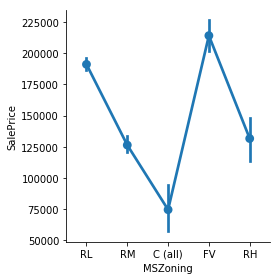

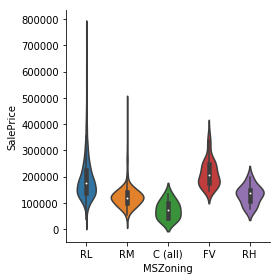

In [8]:
# 離散資料
import matplotlib.pyplot as plt
import seaborn as sns

label = 'MSZoning'
# 畫出直方圖
data = train_data[label]
plt.hist(data)

# seaborn 會自動移除 NaN 值，需注意
# 畫出直方圖
# sns.factorplot(label, hue='SalePrice', data=train_data, kind="count")
# 顯示中心值與信賴區間
sns.factorplot(label, 'SalePrice', data=train_data, kind="point")
# 顯示中位數與四分位距
sns.factorplot(label, 'SalePrice', data=train_data, kind="violin")
plt.show()

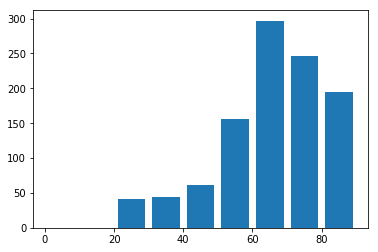

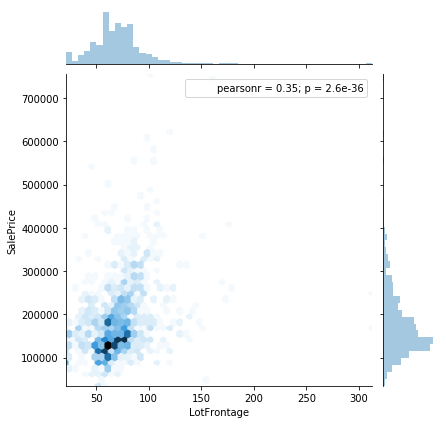

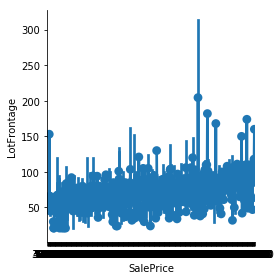

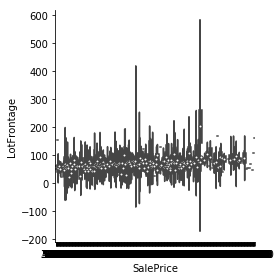

In [9]:
# 連續資料
import matplotlib.pyplot as plt
import seaborn as sns

label = 'LotFrontage'
# 畫出直方圖
# 移除 NA 值
data = train_data[label].dropna(how='any')
plt.hist(data, bins=range(0,100,10), rwidth=0.8)

# seaborn 會自動移除 NaN 值，需注意
# 畫出相關性的圖
sns.jointplot(label, 'SalePrice', data=train_data, kind='hex')
# 顯示中心值與信賴區間
sns.factorplot('SalePrice', label, data=train_data, kind="point")
# 顯示中位數與四分位距
sns.factorplot('SalePrice', label, data=train_data, kind="violin")

plt.show()

資料處理

In [10]:
X_origin = train_data.drop(['Id', 'SalePrice'], axis='columns')
y = train_data['SalePrice']
y = np.log1p(y)

In [11]:
test_data = pd.read_csv("../input/test.csv")
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [12]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [13]:
# NA 個數
naCount = test_data.isnull().sum()
naCount[naCount > 0]

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [14]:
X_test_origin = test_data.drop(['Id'], axis='columns')

In [15]:
X_all_origin = pd.concat([X_origin, X_test_origin], ignore_index=True)
trainL = len(X_origin)
testL = len(X_test_origin)

X_all_origin.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [16]:
from sklearn import preprocessing

def transSymbolEncoder(x):
    lb = preprocessing.LabelEncoder()
    lb.fit(x)
    return lb.transform(x)

def transSymbolBinary(XX, colName):
    X = XX
    x = X[colName].fillna("NA")
    lb = preprocessing.LabelBinarizer()
    lb.fit(x)
    value = lb.transform(x)
    for i in range(len(value[0])):
        addName = "{}_{}".format(colName, lb.classes_[i])
        X[addName] = value[:, i]

    return X.drop([colName], axis='columns')

# 缺項處理
def fillNA(XX):
    X = XX.copy(deep=True)
    for colName in X.columns:
        if sum(X[colName].isnull()) > 0:
            if X.dtypes[colName] in [np.int64, np.float64]:
                # print("{} is filled by {}".format(colName, X[colName].mean()))
                X[colName] = X[colName].fillna(X[colName].mean())
            elif X.dtypes[colName] in [object]:
                # print("{} is filled by NA".format(colName))
                fillVal = "NA"# X[colName].value_counts().index[0]
                X[colName] = X[colName].fillna(fillVal)
            else:
                print("{} is not define".format(colName))
    return X

def transAll(XX):
    X = XX.copy(deep=True)
    for colName in X.columns:
        if X.dtypes[colName] in [np.int64, np.float64]:
            # print("{} is not transformed".format(colName))
            # X[colName] = (X[colName] - X[colName].mean()) / X[colName].std()
            pass
        elif X.dtypes[colName] in [object]:
            # print("{} is transformed".format(colName))
            X = transSymbolBinary(X, colName)
        else:
            print("{} is not define".format(colName))
    
    return X

In [17]:
skewed_feats = (X_all_origin.skew() > 0.75)
skewed_feats = skewed_feats.index

X_all = fillNA(X_all_origin)
X_all[skewed_feats] = np.log1p(X_all[skewed_feats])
X_all = transAll(X_all)
X_all.head(10)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_NA,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.110874,4.189655,9.042040,2.079442,1.791759,7.602900,7.602900,5.283204,6.561031,0.000000,...,0,0,0,1,0,0,0,0,1,0
1,3.044522,4.394449,9.169623,1.945910,2.197225,7.589336,7.589336,0.000000,6.886532,0.000000,...,0,0,0,1,0,0,0,0,1,0
2,4.110874,4.234107,9.328212,2.079442,1.791759,7.601902,7.602401,5.093750,6.188264,0.000000,...,0,0,0,1,0,0,0,0,1,0
3,4.262680,4.110874,9.164401,2.079442,1.791759,7.557995,7.586296,0.000000,5.379897,0.000000,...,0,0,0,1,1,0,0,0,0,0
4,4.110874,4.442651,9.565284,2.197225,1.791759,7.601402,7.601402,5.860786,6.486161,0.000000,...,0,0,0,1,0,0,0,0,1,0
5,3.931826,4.454347,9.555064,1.791759,1.791759,7.597898,7.598900,0.000000,6.597146,0.000000,...,0,0,0,1,0,0,0,0,1,0
6,3.044522,4.330733,9.218804,2.197225,1.791759,7.603399,7.603898,5.231109,7.222566,0.000000,...,0,0,0,1,0,0,0,0,1,0
7,4.110874,4.252854,9.247925,2.079442,1.945910,7.587817,7.587817,5.484797,6.756932,3.496508,...,0,0,0,1,0,0,0,0,1,0
8,3.931826,3.951244,8.719481,2.079442,1.791759,7.566311,7.576097,0.000000,0.000000,0.000000,...,0,0,0,1,1,0,0,0,0,0
9,5.252273,3.931826,8.912069,1.791759,1.945910,7.570443,7.576097,0.000000,6.747587,0.000000,...,0,0,0,1,0,0,0,0,1,0


In [18]:
X = X_all[:trainL]
X_test = X_all[trainL:]

In [19]:
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_NA,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.110874,4.189655,9.042040,2.079442,1.791759,7.602900,7.602900,5.283204,6.561031,0.0,...,0,0,0,1,0,0,0,0,1,0
1,3.044522,4.394449,9.169623,1.945910,2.197225,7.589336,7.589336,0.000000,6.886532,0.0,...,0,0,0,1,0,0,0,0,1,0
2,4.110874,4.234107,9.328212,2.079442,1.791759,7.601902,7.602401,5.093750,6.188264,0.0,...,0,0,0,1,0,0,0,0,1,0
3,4.262680,4.110874,9.164401,2.079442,1.791759,7.557995,7.586296,0.000000,5.379897,0.0,...,0,0,0,1,1,0,0,0,0,0
4,4.110874,4.442651,9.565284,2.197225,1.791759,7.601402,7.601402,5.860786,6.486161,0.0,...,0,0,0,1,0,0,0,0,1,0


In [20]:
X.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_NA,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.0,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,3.818794,4.215224,9.110966,1.940309,1.869266,7.586821,7.593756,2.145670,4.229731,0.655398,...,0.0,0.083562,0.002055,0.867808,0.069178,0.002740,0.008219,0.013699,0.820548,0.085616
std,0.688354,0.314483,0.517369,0.201983,0.168400,0.015389,0.010424,2.630552,2.992052,1.845045,...,0.0,0.276824,0.045299,0.338815,0.253844,0.052289,0.090317,0.116277,0.383862,0.279893
min,3.044522,3.091042,7.170888,0.693147,0.693147,7.535297,7.576097,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.044522,4.110874,8.929898,1.791759,1.791759,7.578145,7.584773,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,3.931826,4.252854,9.156887,1.945910,1.791759,7.587817,7.598399,0.000000,5.951943,0.000000,...,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,4.262680,4.382027,9.358976,2.079442,1.945910,7.601402,7.603399,5.107456,6.569832,0.000000,...,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,5.252273,5.749393,12.279537,2.397895,2.302585,7.606387,7.606387,7.378384,8.638525,7.296413,...,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


演算法實驗

In [21]:
from sklearn.model_selection import cross_val_score  
import seaborn as sns

def evaluate_model(clf, X, y):
    # 5-Fold Cross Validation
    scores = cross_val_score(clf, X, y, cv=10, scoring="neg_mean_squared_error")
    # 平均埴
    m = scores.mean()
    # 標準差
    sd = scores.std()
    
    # 訓練資料準確度
    clf.fit(X, y)
    score = clf.score(X, y)
    
    # 中位數
    ax = sns.boxplot(scores)
    ax.set_title("val_mean:{:.5f}, val_std:{:.5f}\ntrain_score:{:.2f}\n\nclf:{}".format(m, sd, score, clf))
    
    return clf

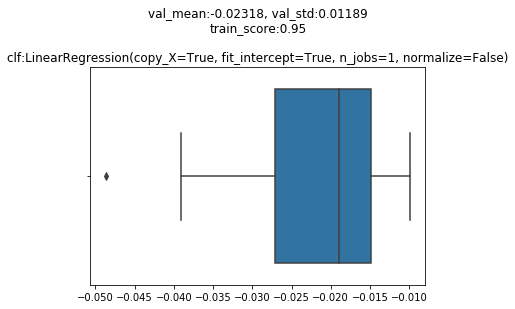

In [22]:
#
from sklearn.linear_model import LinearRegression

clf = LinearRegression()
linear_clf = evaluate_model(clf, X, y)

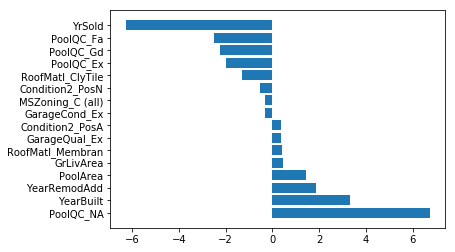

Feature ranking:
1. feature PoolQC_NA (6.736199)
2. feature YearBuilt (3.304111)
3. feature YearRemodAdd (1.871175)
4. feature PoolArea (1.431733)
5. feature GrLivArea (0.437569)
6. feature RoofMatl_Membran (0.392356)
7. feature GarageQual_Ex (0.377817)
8. feature Condition2_PosA (0.374866)
9. feature GarageCond_Ex (-0.311005)
10. feature MSZoning_C (all) (-0.324474)
11. feature Condition2_PosN (-0.549724)
12. feature RoofMatl_ClyTile (-1.306213)
13. feature PoolQC_Ex (-2.003042)
14. feature PoolQC_Gd (-2.249830)
15. feature PoolQC_Fa (-2.483327)
16. feature YrSold (-6.277556)


In [23]:
import numpy as np
import matplotlib.pyplot as plt

threhold = 3e-1
# Make a fake dataset:
features = linear_clf.coef_[abs(linear_clf.coef_) > threhold]
names = X.columns[abs(linear_clf.coef_) > threhold]

# feature 重要性
importances = features
# 由小到大排序並回傳對應的 index，再將之反向，也就是改為由大到小的排序
indices = np.argsort(importances)[::-1]
# 個數
n = len(features)
# 畫直方圖
plt.barh(range(n), importances[indices[:n]], align="center")
plt.yticks(range(n), names[indices[:n]])
plt.show()

# 印出排序後的 feature 重要性
print("Feature ranking:")
for f in range(n):
    print("%d. feature %s (%f)" % (f + 1, names[indices[f]], importances[indices[f]]))
    
linear_important_index = names[indices]

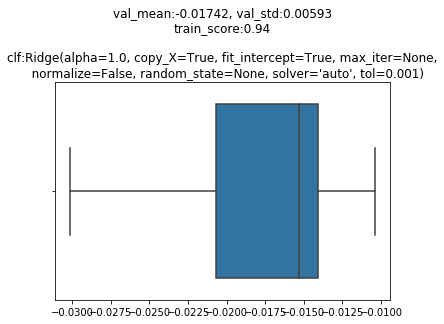

In [24]:
# 0.12733
from sklearn import linear_model

clf = linear_model.Ridge()
linearRidge_clf = evaluate_model(clf, X, y)

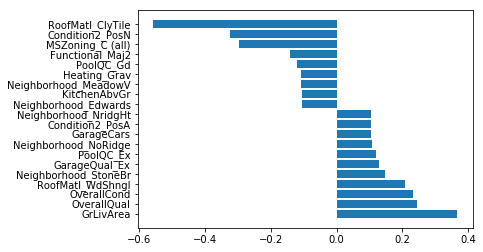

Feature ranking:
1. feature GrLivArea (0.367278)
2. feature OverallQual (0.243561)
3. feature OverallCond (0.232666)
4. feature RoofMatl_WdShngl (0.209081)
5. feature Neighborhood_StoneBr (0.148044)
6. feature GarageQual_Ex (0.128140)
7. feature PoolQC_Ex (0.121049)
8. feature Neighborhood_NoRidge (0.107065)
9. feature GarageCars (0.105387)
10. feature Condition2_PosA (0.103901)
11. feature Neighborhood_NridgHt (0.103485)
12. feature Neighborhood_Edwards (-0.104077)
13. feature KitchenAbvGr (-0.105917)
14. feature Neighborhood_MeadowV (-0.108041)
15. feature Heating_Grav (-0.109124)
16. feature PoolQC_Gd (-0.121306)
17. feature Functional_Maj2 (-0.140938)
18. feature MSZoning_C (all) (-0.295872)
19. feature Condition2_PosN (-0.323821)
20. feature RoofMatl_ClyTile (-0.557862)


In [25]:
import numpy as np
import matplotlib.pyplot as plt

threhold = 1e-1
# Make a fake dataset:
features = linearRidge_clf.coef_[abs(linearRidge_clf.coef_) > threhold]
names = X.columns[abs(linearRidge_clf.coef_) > threhold]

# feature 重要性
importances = features
# 由小到大排序並回傳對應的 index，再將之反向，也就是改為由大到小的排序
indices = np.argsort(importances)[::-1]
# 個數
n = len(features)
# 畫直方圖
plt.barh(range(n), importances[indices[:n]], align="center")
plt.yticks(range(n), names[indices[:n]])
plt.show()

# 印出排序後的 feature 重要性
print("Feature ranking:")
for f in range(n):
    print("%d. feature %s (%f)" % (f + 1, names[indices[f]], importances[indices[f]]))
    
linearRidge_important_index = names[indices]

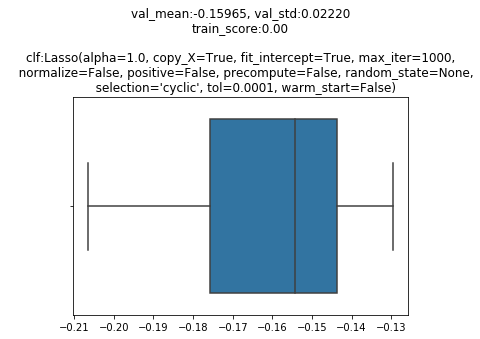

In [26]:
from sklearn import linear_model

clf = linear_model.Lasso()
linearLasso_clf = evaluate_model(clf, X, y)

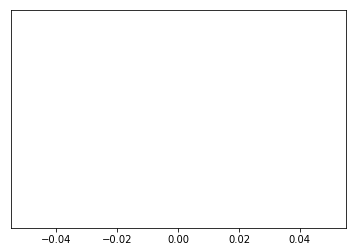

Feature ranking:


In [27]:
import numpy as np
import matplotlib.pyplot as plt

threhold = 3e-1
# Make a fake dataset:
features = linearLasso_clf.coef_[abs(linearLasso_clf.coef_) > threhold]
names = X.columns[abs(linearLasso_clf.coef_) > threhold]

# feature 重要性
importances = features
# 由小到大排序並回傳對應的 index，再將之反向，也就是改為由大到小的排序
indices = np.argsort(importances)[::-1]
# 個數
n = len(features)
# 畫直方圖
plt.barh(range(n), importances[indices[:n]], align="center")
plt.yticks(range(n), names[indices[:n]])
plt.show()

# 印出排序後的 feature 重要性
print("Feature ranking:")
for f in range(n):
    print("%d. feature %s (%f)" % (f + 1, names[indices[f]], importances[indices[f]]))
    
linearLasso_important_index = names[indices]

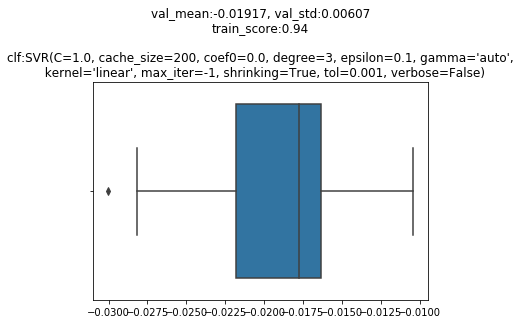

In [28]:
#
from sklearn.svm import SVR

clf = SVR(kernel='linear')
linearSVR_clf = evaluate_model(clf, X, y)

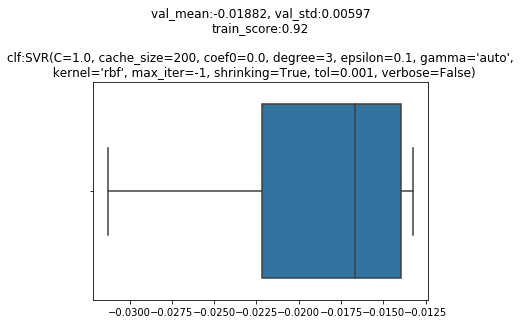

In [29]:
#
from sklearn.svm import SVR

clf = SVR(kernel='rbf')
rbfSVR_clf = evaluate_model(clf, X, y)

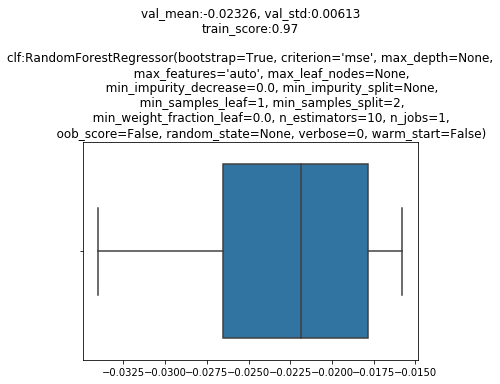

In [30]:
#
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor()
RandomForest_clf = evaluate_model(clf, X, y)

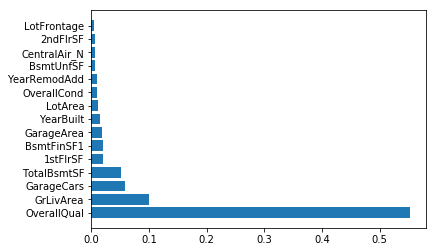

Feature ranking:
1. feature OverallQual (0.552875)
2. feature GrLivArea (0.099953)
3. feature GarageCars (0.058969)
4. feature TotalBsmtSF (0.050982)
5. feature 1stFlrSF (0.020584)
6. feature BsmtFinSF1 (0.020299)
7. feature GarageArea (0.018159)
8. feature YearBuilt (0.016106)
9. feature LotArea (0.012027)
10. feature OverallCond (0.010452)
11. feature YearRemodAdd (0.009928)
12. feature BsmtUnfSF (0.006493)
13. feature CentralAir_N (0.006151)
14. feature 2ndFlrSF (0.005934)
15. feature LotFrontage (0.005490)


In [31]:
# feature 重要性
importances = RandomForest_clf.feature_importances_
# 由小到大排序並回傳對應的 index，再將之反向，也就是改為由大到小的排序
indices = np.argsort(importances)[::-1]
# 印出的個數
n = sum(importances > 0.005)
 
# 畫直方圖
plt.barh(range(n), importances[indices[:n]], align="center")
plt.yticks(range(n), X.columns[indices[:n]])
plt.show()

# 印出排序後的 feature 重要性
print("Feature ranking:")
for f in range(n):
    print("%d. feature %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))
    
RandomForest_important_index = X.columns[indices[:n]]

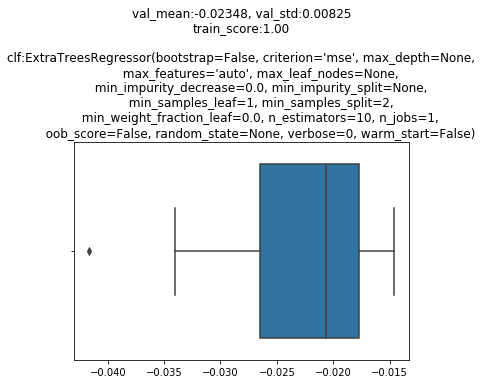

In [32]:
#
from sklearn.ensemble import ExtraTreesRegressor

clf = ExtraTreesRegressor()
ExtraTrees_clf = evaluate_model(clf, X, y)

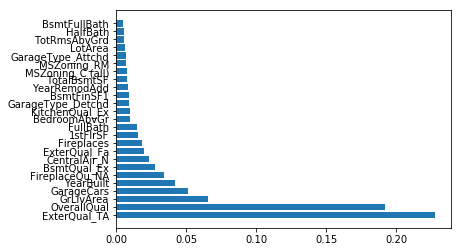

Feature ranking:
1. feature ExterQual_TA (0.227428)
2. feature OverallQual (0.191663)
3. feature GrLivArea (0.065842)
4. feature GarageCars (0.051435)
5. feature YearBuilt (0.042292)
6. feature FireplaceQu_NA (0.034517)
7. feature BsmtQual_Ex (0.027484)
8. feature CentralAir_N (0.023659)
9. feature ExterQual_Fa (0.019977)
10. feature Fireplaces (0.018254)
11. feature 1stFlrSF (0.015657)
12. feature FullBath (0.015231)
13. feature BedroomAbvGr (0.010050)
14. feature KitchenQual_Ex (0.009846)
15. feature GarageType_Detchd (0.009376)
16. feature BsmtFinSF1 (0.009200)
17. feature YearRemodAdd (0.008357)
18. feature TotalBsmtSF (0.007985)
19. feature MSZoning_C (all) (0.007935)
20. feature MSZoning_RM (0.007027)
21. feature GarageType_Attchd (0.006930)
22. feature LotArea (0.006607)
23. feature TotRmsAbvGrd (0.005963)
24. feature HalfBath (0.005448)
25. feature BsmtFullBath (0.005111)


In [33]:
# feature 重要性
importances = ExtraTrees_clf.feature_importances_
# 由小到大排序並回傳對應的 index，再將之反向，也就是改為由大到小的排序
indices = np.argsort(importances)[::-1]
# 印出的個數
n = sum(importances > 0.005)

# 畫直方圖
plt.barh(range(n), importances[indices[:n]], align="center")
plt.yticks(range(n), X.columns[indices[:n]])
plt.show()

# 印出排序後的 feature 重要性
print("Feature ranking:")
for f in range(n):
    print("%d. feature %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))
    
ExtraTrees_important_index = X.columns[indices[:n]]

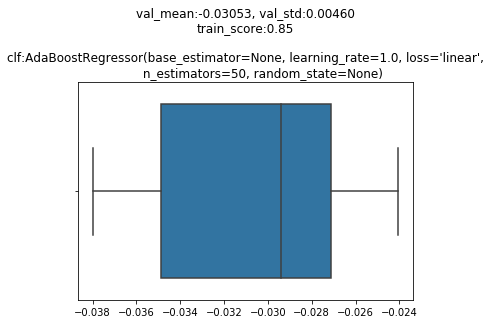

In [34]:
#
from sklearn.ensemble import AdaBoostRegressor

clf = AdaBoostRegressor()
AdaBoost_clf = evaluate_model(clf, X, y)

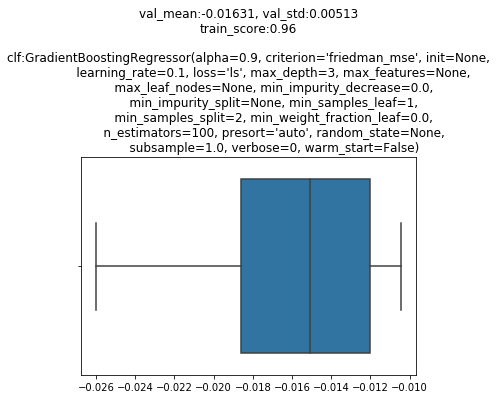

In [35]:
# 0.13455
from sklearn.ensemble import GradientBoostingRegressor

clf = GradientBoostingRegressor()
GradientBoosting_clf = evaluate_model(clf, X, y)

挑選重要 features

In [36]:
temp = pd.Index([])
temp = temp.union(linear_important_index)
temp = temp.union(linearLasso_important_index)
temp = temp.union(linearRidge_important_index)
temp = temp.union(RandomForest_important_index)
index = temp.union(ExtraTrees_important_index)
index

Index(['1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'BsmtFinSF1', 'BsmtFullBath',
       'BsmtQual_Ex', 'BsmtUnfSF', 'CentralAir_N', 'Condition2_PosA',
       'Condition2_PosN', 'ExterQual_Fa', 'ExterQual_TA', 'FireplaceQu_NA',
       'Fireplaces', 'FullBath', 'Functional_Maj2', 'GarageArea', 'GarageCars',
       'GarageCond_Ex', 'GarageQual_Ex', 'GarageType_Attchd',
       'GarageType_Detchd', 'GrLivArea', 'HalfBath', 'Heating_Grav',
       'KitchenAbvGr', 'KitchenQual_Ex', 'LotArea', 'LotFrontage',
       'MSZoning_C (all)', 'MSZoning_RM', 'Neighborhood_Edwards',
       'Neighborhood_MeadowV', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_StoneBr', 'OverallCond', 'OverallQual', 'PoolArea',
       'PoolQC_Ex', 'PoolQC_Fa', 'PoolQC_Gd', 'PoolQC_NA', 'RoofMatl_ClyTile',
       'RoofMatl_Membran', 'RoofMatl_WdShngl', 'TotRmsAbvGrd', 'TotalBsmtSF',
       'YearBuilt', 'YearRemodAdd', 'YrSold'],
      dtype='object')

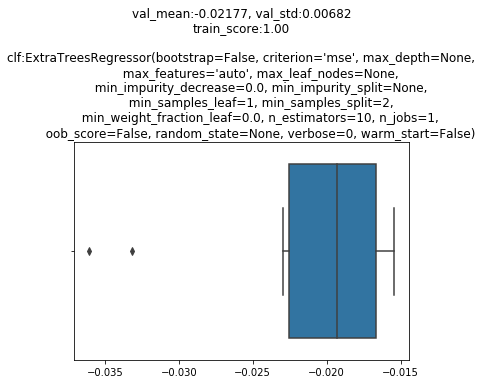

In [37]:
#
from sklearn.ensemble import ExtraTreesRegressor

clf = ExtraTreesRegressor()
ExtraTrees_clf_reduce = evaluate_model(clf, X[index], y)

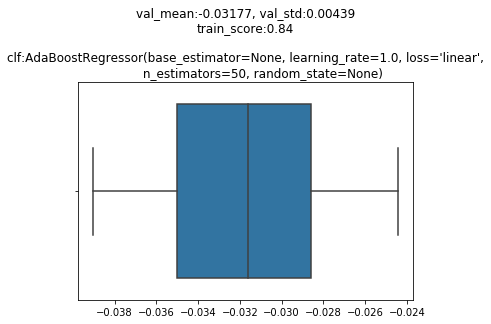

In [38]:
from sklearn.ensemble import AdaBoostRegressor

clf = AdaBoostRegressor()
AdaBoost_clf_reduce = evaluate_model(clf, X[index], y)

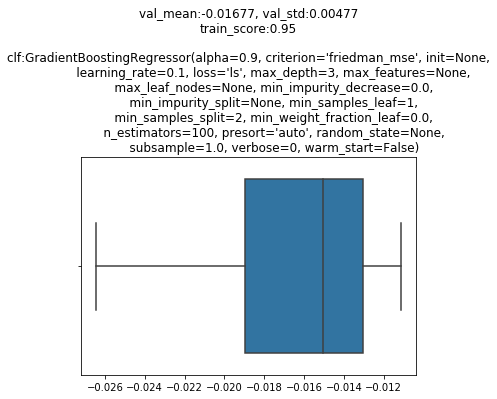

In [39]:
#
from sklearn.ensemble import GradientBoostingRegressor

clf = GradientBoostingRegressor()
GradientBoosting_clf_reduce = evaluate_model(clf, X[index], y)

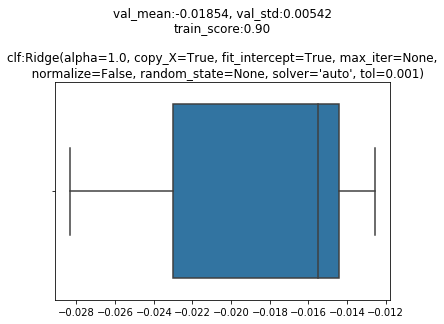

In [40]:
# 0.14136
from sklearn import linear_model

clf = linear_model.Ridge()
linearRidge_clf_reduce = evaluate_model(clf, X[index], y)

結果

In [41]:
clf_final = linearRidge_clf
#X_test = X_test[index]

In [42]:
X_test.head(10)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_NA,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1460,3.044522,4.394449,9.360741,1.791759,1.945910,7.581720,7.581720,0.000000,6.150603,4.976734,...,0,0,0,1,0,0,0,0,1,0
1461,3.044522,4.406719,9.565775,1.945910,1.945910,7.580189,7.580189,4.691348,6.828712,0.000000,...,0,0,0,1,0,0,0,0,1,0
1462,4.110874,4.317488,9.534668,1.791759,1.791759,7.599902,7.600402,0.000000,6.674561,0.000000,...,0,0,0,1,0,0,0,0,1,0
1463,4.110874,4.369448,9.208238,1.945910,1.945910,7.600402,7.600402,3.044522,6.401917,0.000000,...,0,0,0,1,0,0,0,0,1,0
1464,4.795791,3.784190,8.518392,2.197225,1.791759,7.597396,7.597396,0.000000,5.575949,0.000000,...,0,0,0,1,0,0,0,0,1,0
1465,4.110874,4.330733,9.210440,1.945910,1.791759,7.597898,7.598399,0.000000,0.000000,0.000000,...,0,0,0,1,0,0,0,0,1,0
1466,3.044522,4.252854,8.984819,1.945910,2.079442,7.597396,7.604894,0.000000,6.841615,0.000000,...,0,0,0,1,0,0,0,0,1,0
1467,4.110874,4.158883,9.036344,1.945910,1.791759,7.600402,7.600402,0.000000,0.000000,0.000000,...,0,0,0,1,0,0,0,0,1,0
1468,3.044522,4.454347,9.227886,2.079442,1.791759,7.596392,7.596392,0.000000,6.458338,0.000000,...,0,0,0,1,0,0,0,0,1,0
1469,3.044522,4.262680,9.036106,1.609438,1.791759,7.586296,7.586296,0.000000,6.690842,4.369448,...,0,0,0,1,0,0,0,0,1,0


In [43]:
y_predict = clf_final.predict(X_test)

In [44]:
results = pd.DataFrame({
    'Id' : test_data['Id'],
    'SalePrice' : np.expm1(y_predict)
 })
results.to_csv("output.csv", index=False)